d:\codeproj\bstu\sklearn\labs\venv\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
d:\codeproj\bstu\sklearn\labs\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


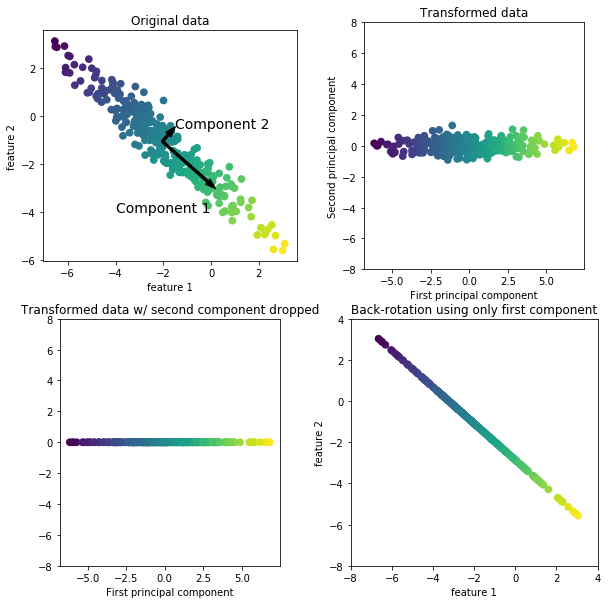

In [1]:
import mglearn
mglearn.plots.plot_pca_illustration()

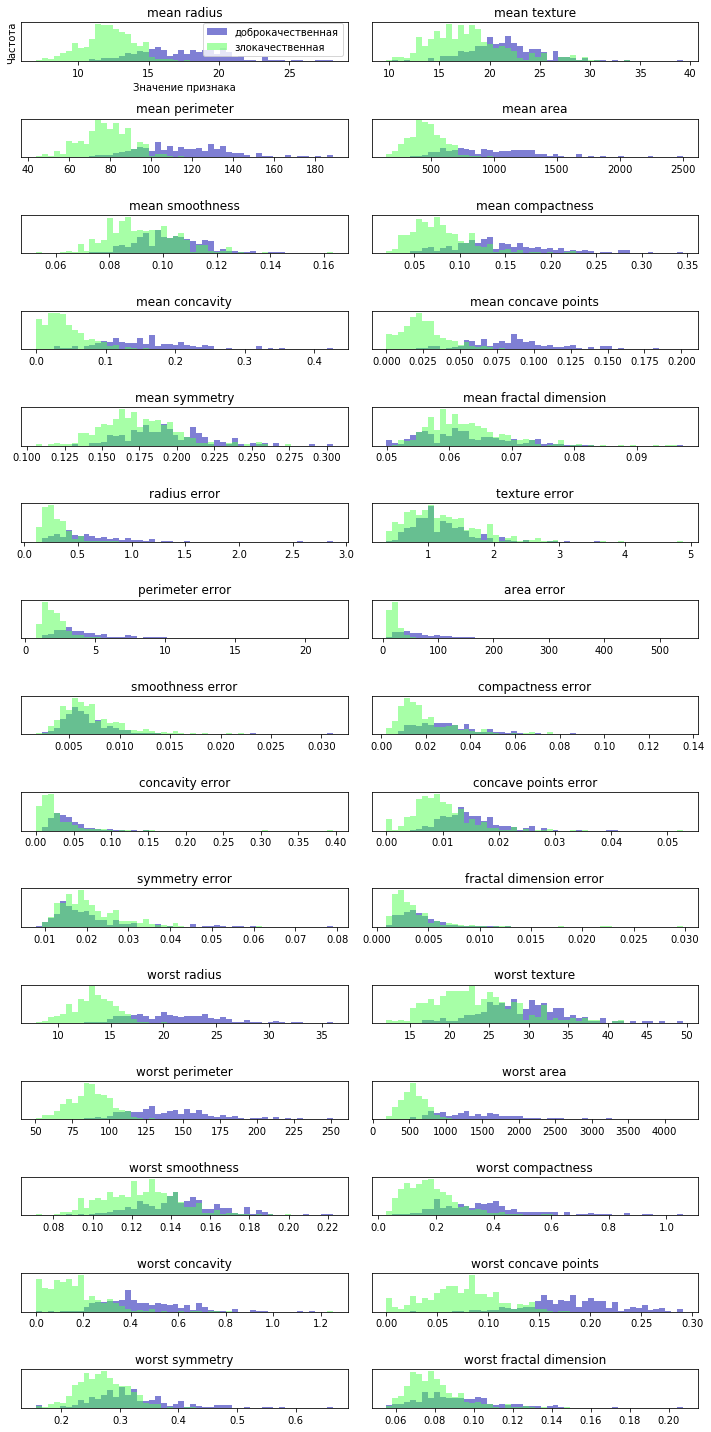

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import  load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20)) 
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1]
ax = axes.ravel() 
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5) 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(()) 
    ax[0].set_xlabel("Значение признака") 
    ax[0].set_ylabel("Частота")
    ax[0].legend(["доброкачественная", "злокачественная"], loc="best") 
fig.tight_layout()


In [3]:
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler 
cancer = load_breast_cancer()

scaler = StandardScaler() 
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)


In [4]:
from sklearn.decomposition import PCA
# оставляем первые две главные компоненты
pca = PCA(n_components=2)
#  подгоняем  модель  PCA  на  наборе  данных  breast  cancer
pca.fit(X_scaled)
# преобразуем данные к первым двум главным компонентам
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


Text(0, 0.5, 'Вторая главная компонента')

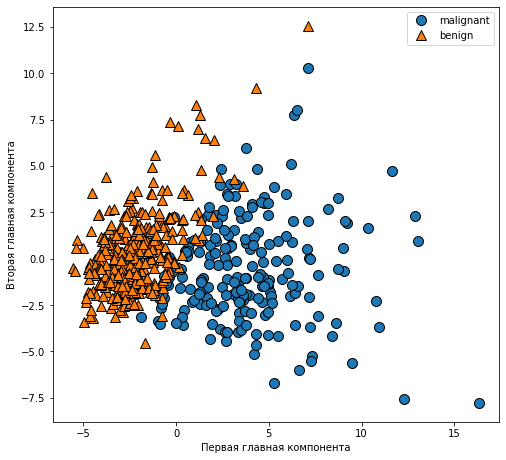

In [5]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target) 
plt.legend(cancer.target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента") 
plt.ylabel("Вторая главная компонента")

In [6]:
print("форма главных компонент: {}".format(pca.components_.shape))

форма главных компонент: (2, 30)


In [7]:
print("компоненты PCA:\n{}".format(pca.components_))

компоненты PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Главные компоненты')

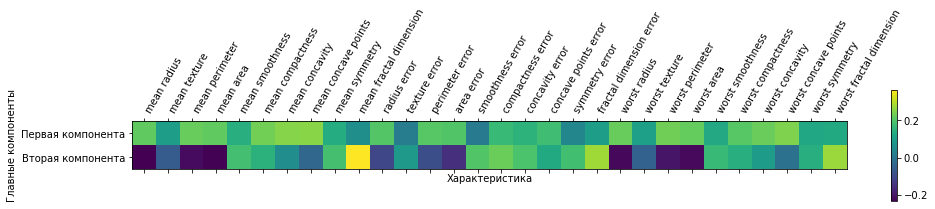

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Первая компонента", "Вторая компонента"]) 
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Характеристика") 
plt.ylabel("Главные компоненты")


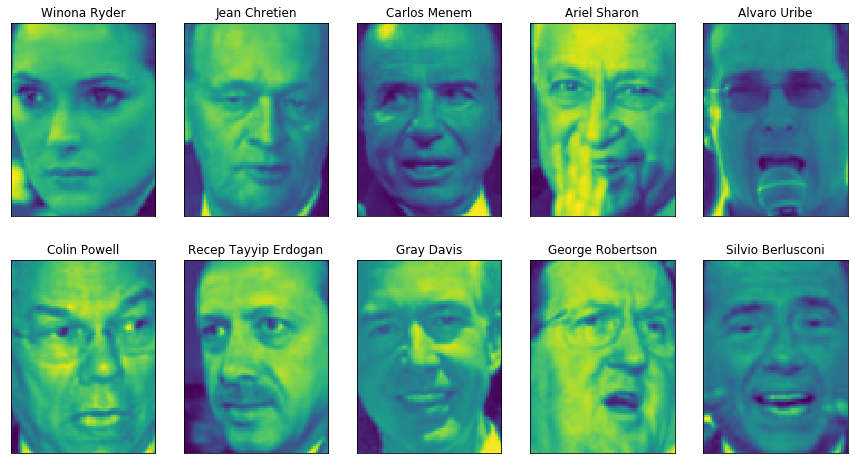

In [9]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()): 
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [10]:
print("форма массива изображений лиц: {}".format(people.images.shape)) 
print("количество классов: {}".format(len(people.target_names)))

форма массива изображений лиц: (3023, 87, 65)
количество классов: 62


In [11]:
counts = np.bincount(people.target)
# печатаем частоты рядом с ответами
for i, (count, name) in enumerate(zip(counts, people.target_names)): 
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [12]:
mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask] 
y_people = people.target[mask]
#  для  получения  большей  стабильности  масштабируем  шкалу  оттенков  серого  так,  чтобы  значения
# были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
X_people = X_people / 255

In [13]:
from sklearn.neighbors import KNeighborsClassifier  # разбиваем данные на обучающий и тестовый наборы 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
#  строим  KNeighborsClassifier  с  одним  соседом 
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train)
print("Правильность на тестовом наборе для 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе для 1-nn: 0.23


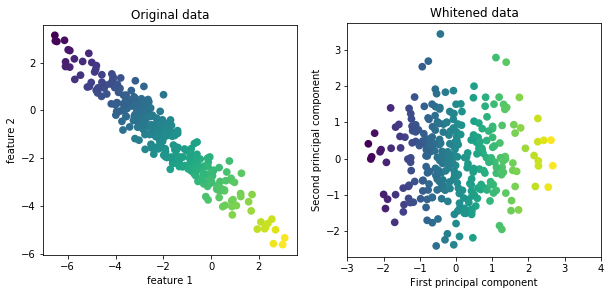

In [14]:
mglearn.plots.plot_pca_whitening()

In [15]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train) 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("обучающие данные после PCA: {}".format(X_train_pca.shape)) 

обучающие данные после PCA: (1547, 100)


In [16]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train_pca, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test_pca, y_test)))

Правильность на тестовом наборе: 0.31


In [17]:
print("форма pca.components_: {}".format(pca.components_.shape))

форма pca.components_: (100, 5655)


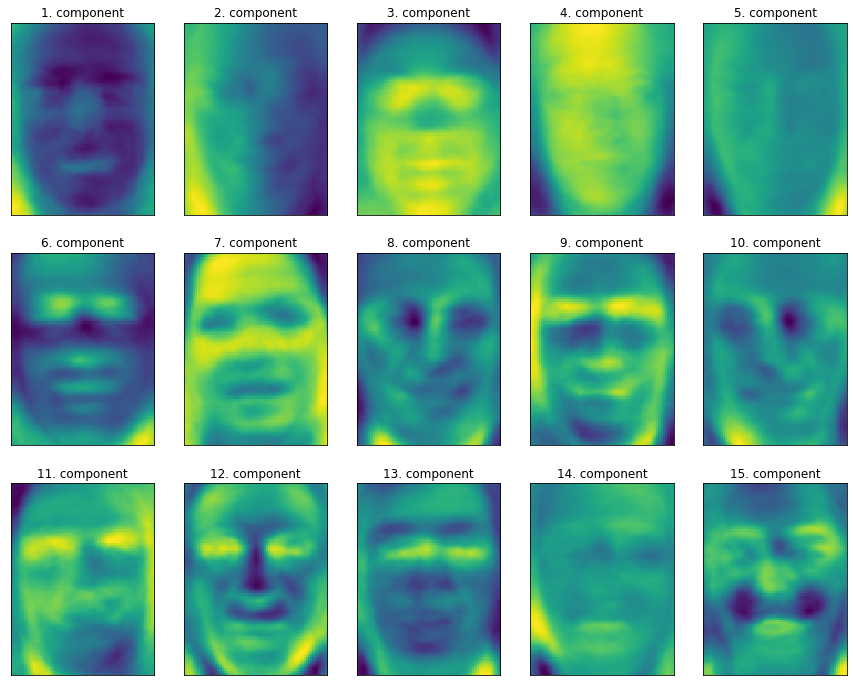

In [18]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())): 
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

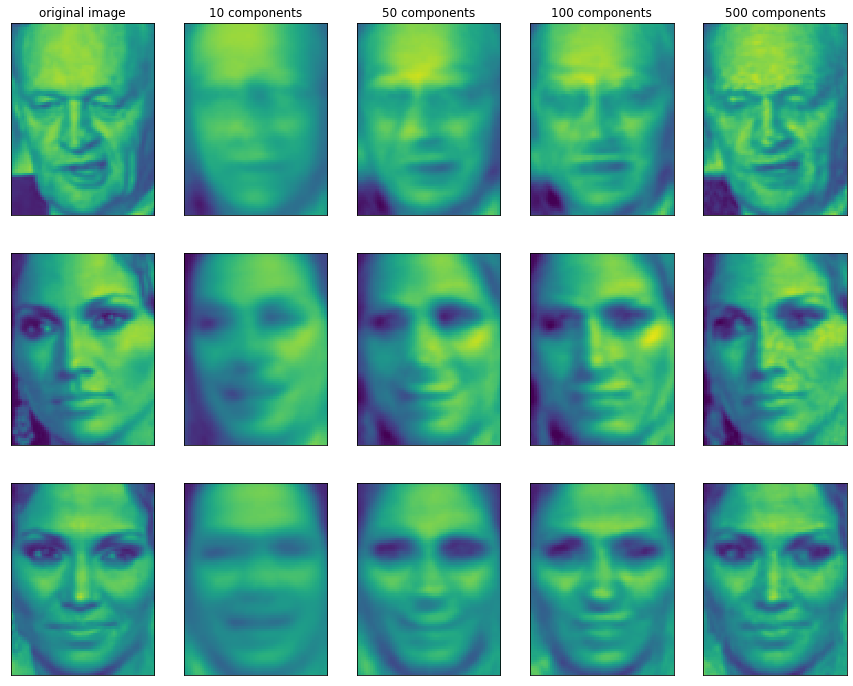

In [19]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Вторая главная компонента')

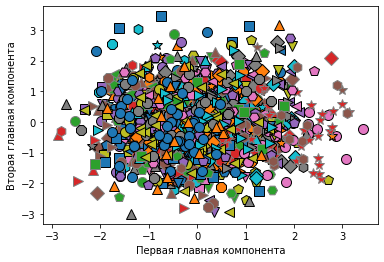

In [20]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train) 
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

In [21]:
print("=================================13-1")

=================================13-1


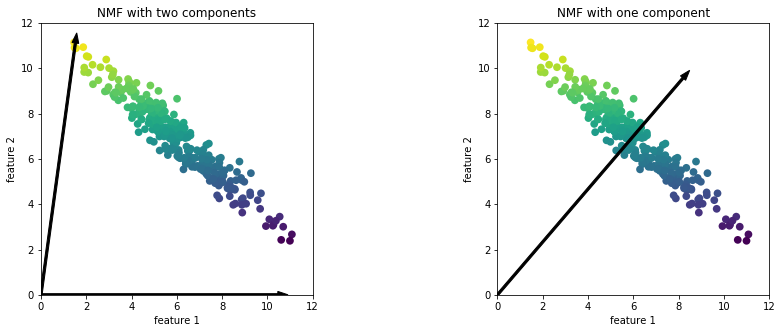

In [22]:
mglearn.plots.plot_nmf_illustration()

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
______________________________________________________nmf_faces - 400.7s, 6.7min


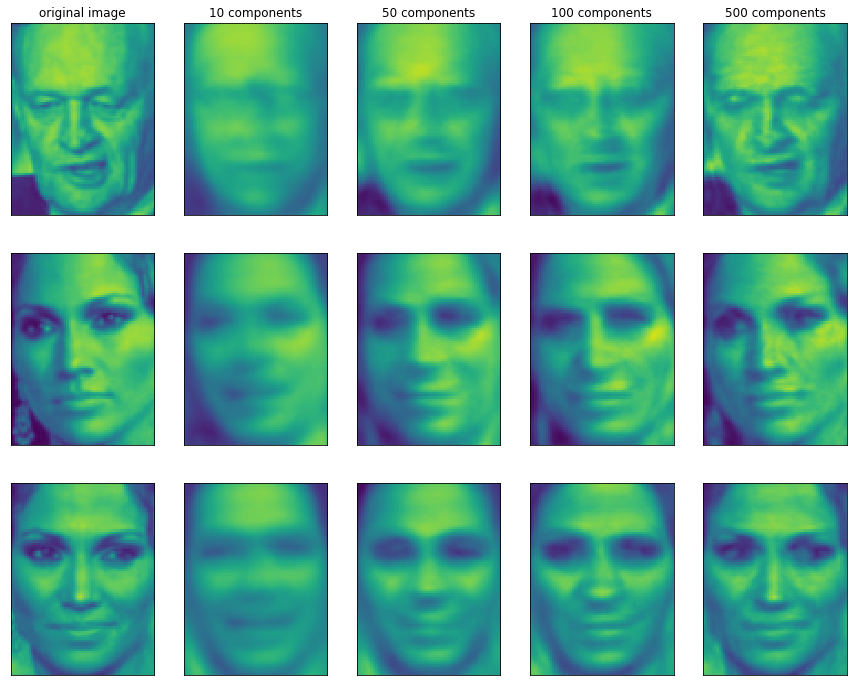

In [23]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

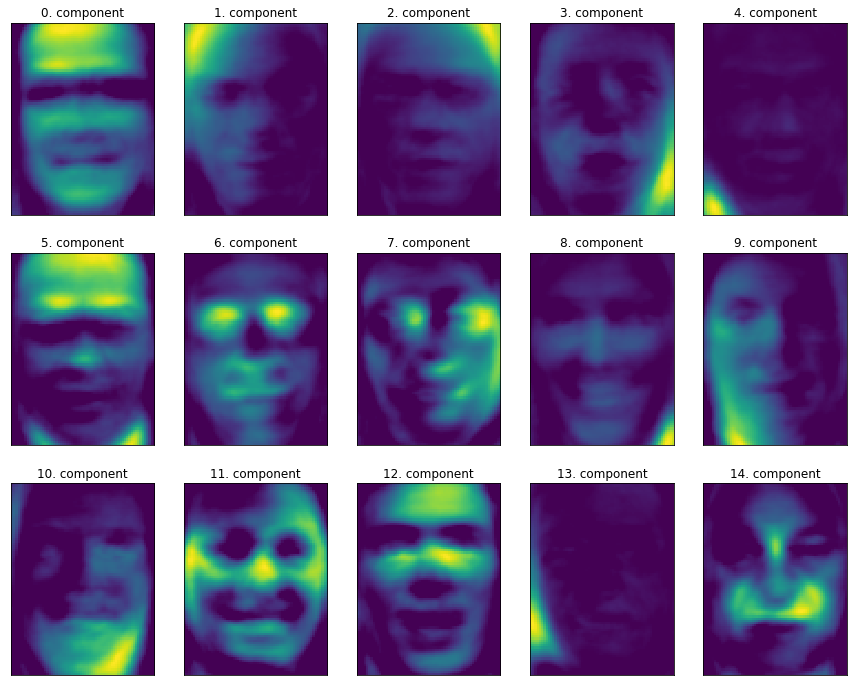

In [24]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0) 
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train) 
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())): 
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

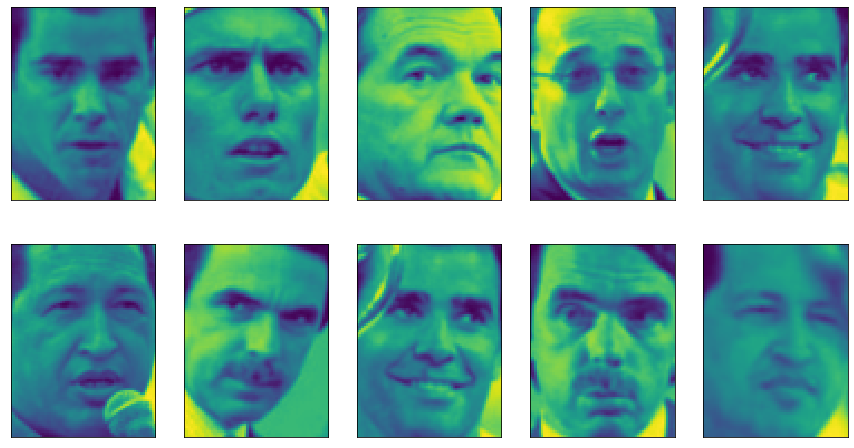

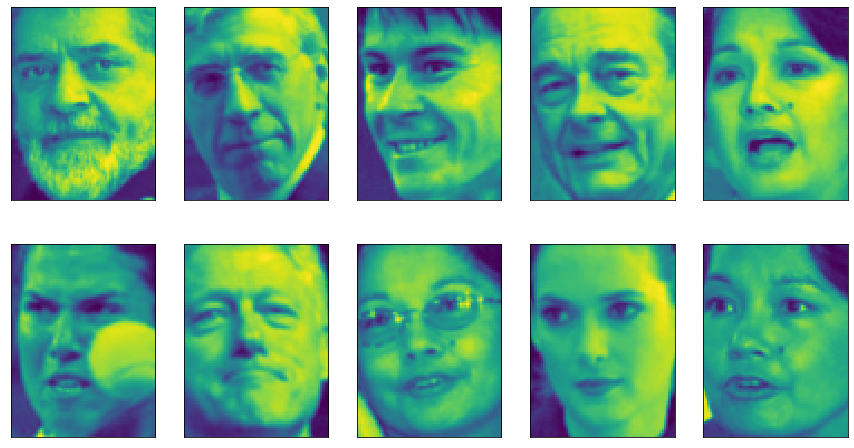

In [31]:
compn = 3
#  сортируем  по  3-й  компоненте,  выводим  первые  10  изображений
inds = np.argsort(X_train_nmf[:, compn])[::-1] 
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()}) 
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    compn = 7
#  сортируем  по  7-й  компоненте,  выводим  первые  10  изображений
inds = np.argsort(X_train_nmf[:, compn])[::-1] 
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()}) 

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))


Text(0, 0.5, 'Сигнал')

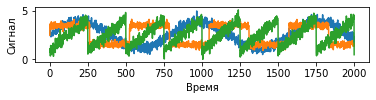

In [32]:
S = mglearn.datasets.make_signals() 
plt.figure(figsize=(6, 1)) 
plt.plot(S, '-') 
plt.xlabel("Время") 
plt.ylabel("Сигнал")

In [33]:
A = np.random.RandomState(0).uniform(size=(100, 3)) 
X = np.dot(S, A.T)
print("Форма измерений: {}".format(X.shape))

Форма измерений: (2000, 100)


In [35]:
nmf = NMF(n_components=3, random_state=42) 
S_ = nmf.fit_transform(X)
print("Форма восстановленного сигнала: {}".format(S_.shape))

Форма восстановленного сигнала: (2000, 3)


In [36]:
pca = PCA(n_components=3) 
H = pca.fit_transform(X)

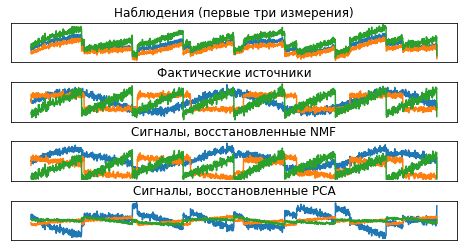

In [39]:
models = [X, S, S_, H]
names = ['Наблюдения (первые три измерения)', 'Фактические источники', 'Сигналы, восстановленные NMF', 'Сигналы, восстановленные PCA']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes): 
    ax.set_title(name)
    ax.plot(model[:, :3], '-')


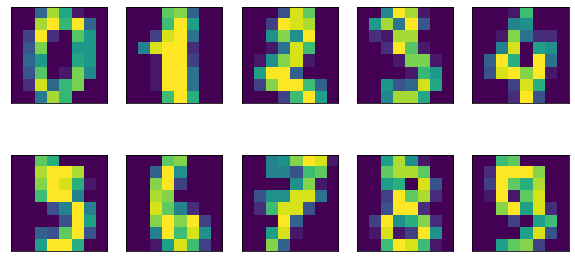

In [41]:
from sklearn.datasets import load_digits 
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()}) 
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

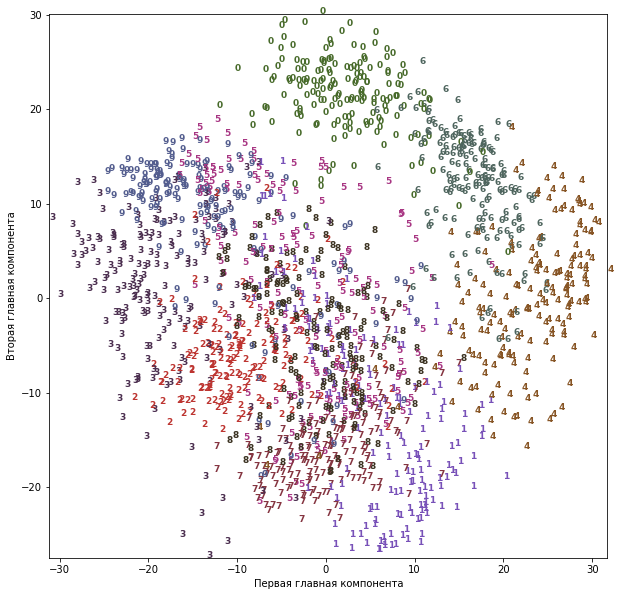

In [44]:
pca = PCA(n_components=2) 
pca.fit(digits.data)
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max()) 
for i in range(len(digits.data)):
#  строим  график,  где  цифры  представлены  символами  вместо  точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9}) 
    plt.xlabel("Первая главная компонента") 
    plt.ylabel("Вторая главная компонента")

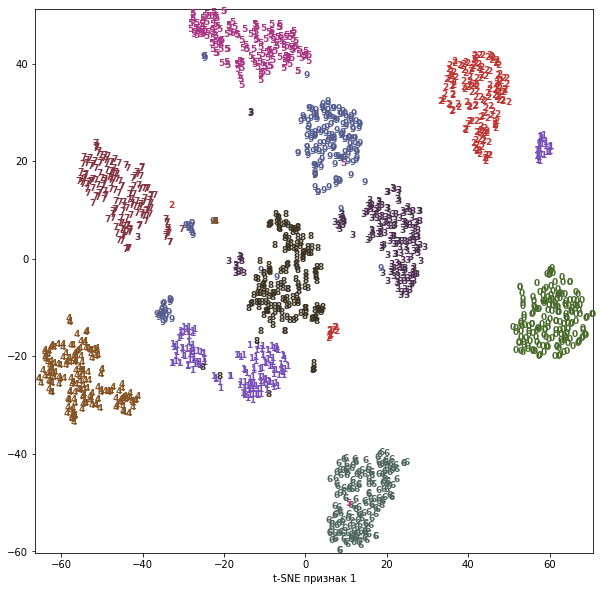

In [48]:
from sklearn.manifold import TSNE 
tsne = TSNE(random_state=42)
#  используем  метод  fit_transform  вместо  fit,  т.к.  класс  TSNE  не  использует  метод  transform
digits_tsne = tsne.fit_transform(digits.data)
 
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1) 
for i in range(len(digits.data)):
#  строим  график,  где  цифры  представлены  символами  вместо  точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9}) 
    plt.xlabel("t-SNE признак 0")
    plt.xlabel("t-SNE признак 1")

In [49]:
print('=============================13-2')

=============================13-2


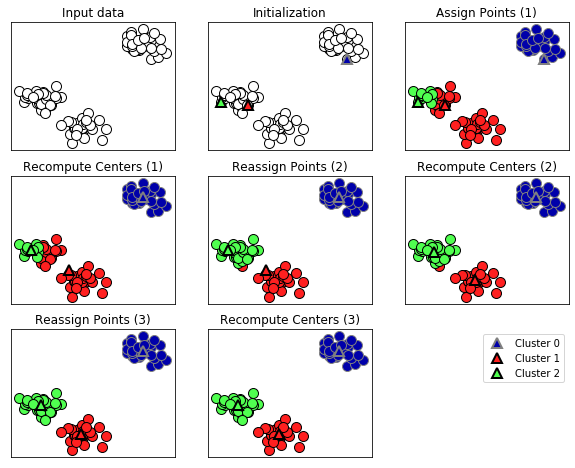

In [50]:
mglearn.plots.plot_kmeans_algorithm()

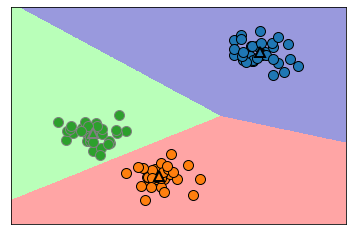

In [51]:
mglearn.plots.plot_kmeans_boundaries()

In [55]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
# генерируем синтетические двумерные данные
X, y = make_blobs(random_state=1)
# строим модель кластеризации 
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
print("Принадлежность к кластерам:\n{}".format(kmeans.labels_))

Принадлежность к кластерам:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [57]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


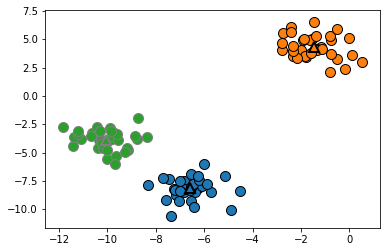

In [58]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

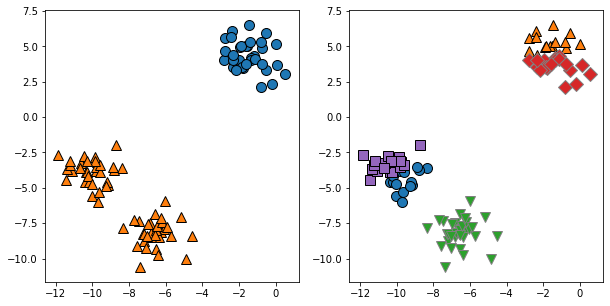

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#  использование  двух  центров  кластеров:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
#  использование  пяти  центров  кластеров:
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'Признак 1')

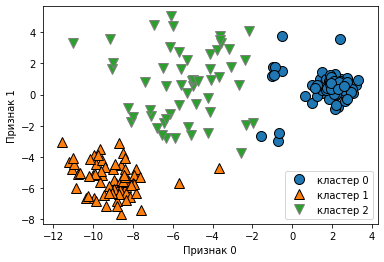

In [62]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["кластер 0", "кластер 1", "кластер 2"], loc='best')
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0, 0.5, 'Признак 1')

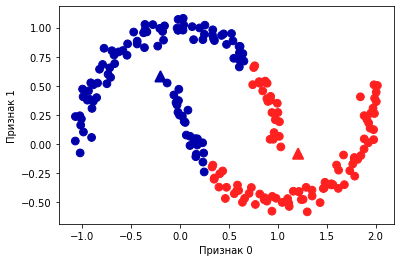

In [71]:
#  генерируем  синтетические  данные  two_moons  (на  этот  раз  с  меньшим  количеством  шума)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# группируем данные в два кластера 
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
y_pred = kmeans.predict(X)
# строим график принадлежности к кластерам и центров кластеров 
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60) 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2) 
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
